AI ASSIGNMENT 3

Name:Asjad sayyed
roll number : 34

Description: Build an ANN model for Drug classification.

Dataset Link - https://www.kaggle.com/datasets/prathamtripathi/drug-classification

1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

2. Load the Dataset

In [ ]:
df = pd.read_csv('/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.shape

(200, 6)

3. Data Preprocessing

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.isnull().sum() #Checking any null values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

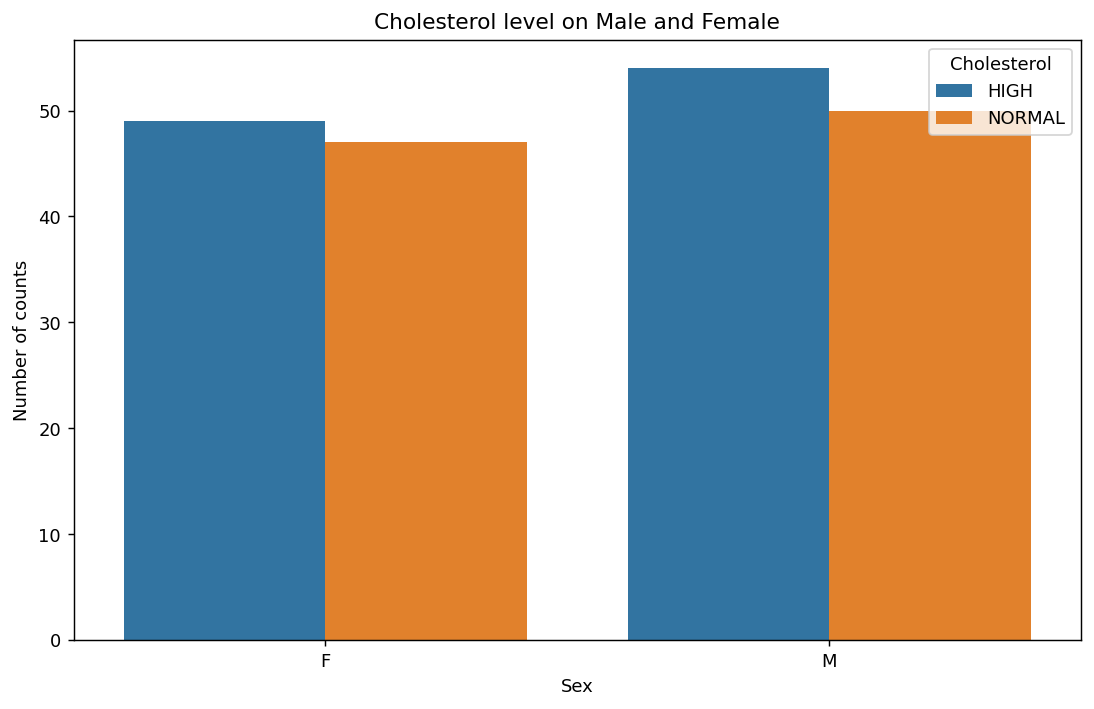

In [ ]:
plt.figure(figsize = (10,6), dpi = 130)
sns.countplot(data = df, x = 'Sex', hue = 'Cholesterol')
plt.title('Cholesterol level on Male and Female')
plt.xlabel('Sex')
plt.ylabel('Number of counts')
plt.show()

In [ ]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

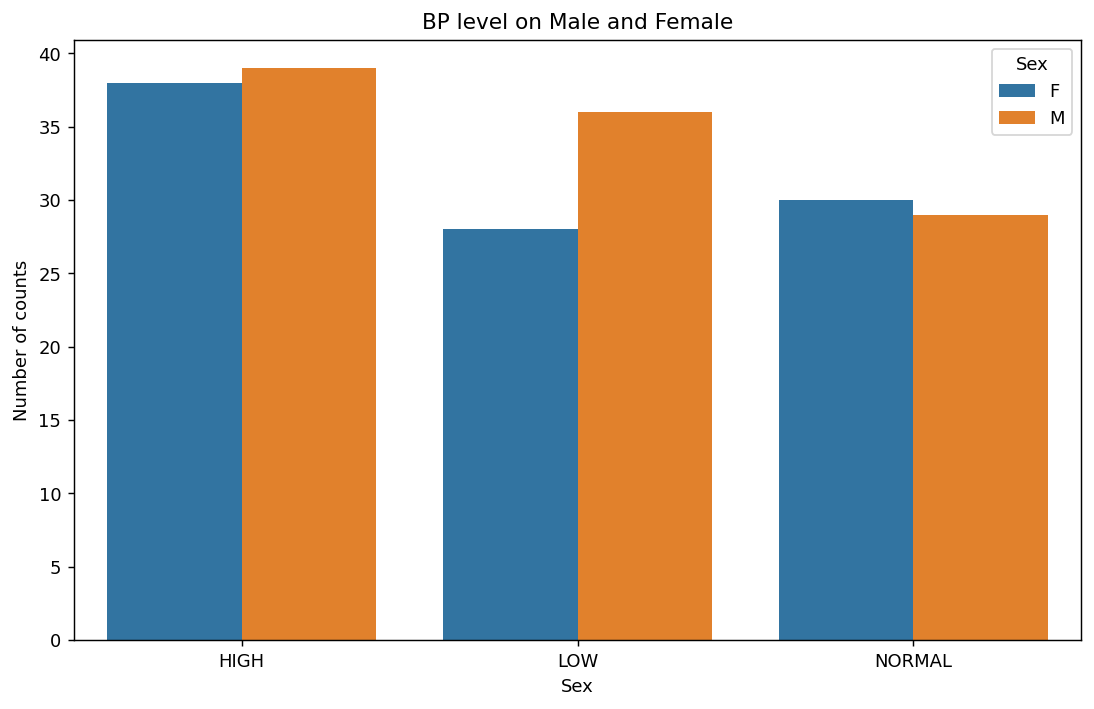

In [ ]:
plt.figure(figsize = (10,6), dpi = 130)
sns.countplot(data = df, x = 'BP', hue = 'Sex')
plt.title('BP level on Male and Female')
plt.xlabel('Sex')
plt.ylabel('Number of counts')
plt.show()

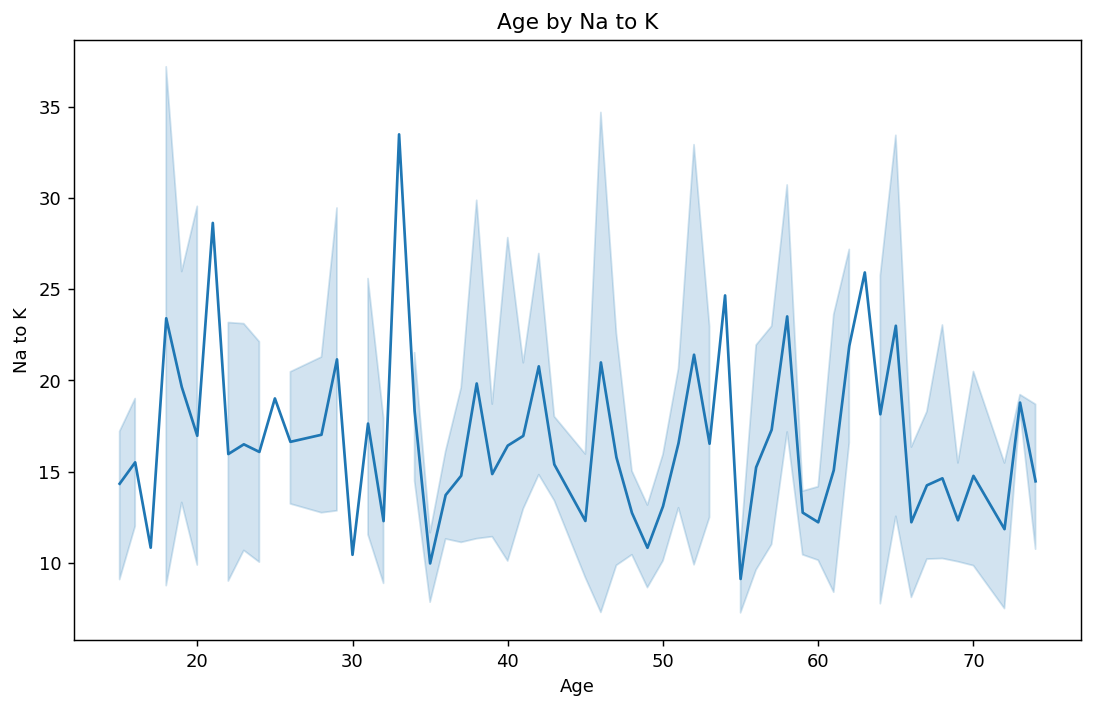

In [ ]:
plt.figure(figsize = (10,6), dpi = 130)
sns.lineplot(data = df, x = 'Age',y = 'Na_to_K')
plt.title('Age by Na to K')
plt.xlabel('Age')
plt.ylabel('Na to K')
plt.show()

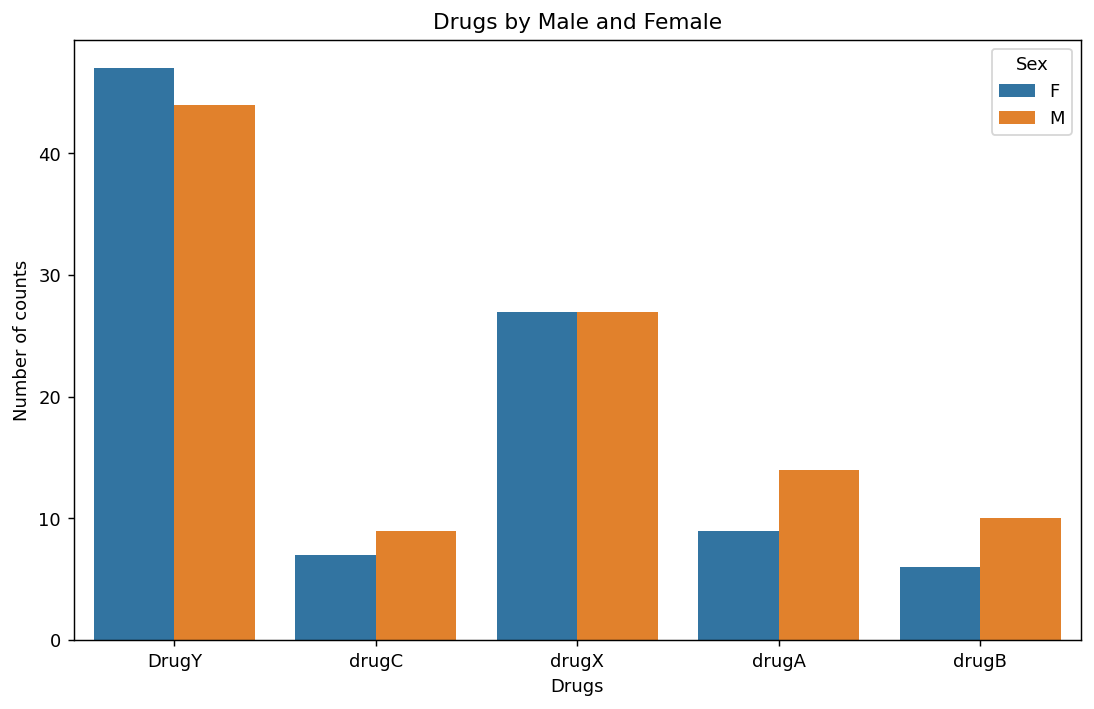

In [ ]:
plt.figure(figsize = (10,6), dpi = 130)
sns.countplot(data = df, x = 'Drug', hue = 'Sex')
plt.title('Drugs by Male and Female')
plt.xlabel('Drugs')
plt.ylabel('Number of counts')
plt.show()

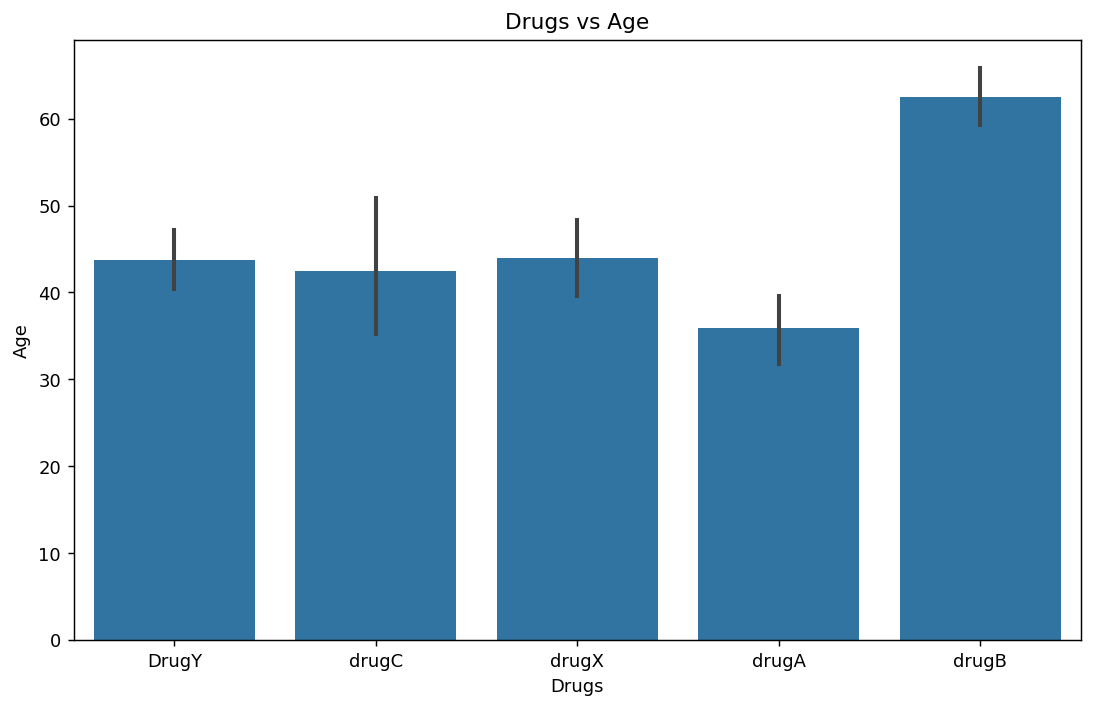

In [ ]:
plt.figure(figsize = (10,6), dpi = 130)
sns.barplot(data = df, x = 'Drug', y = 'Age')
plt.title('Drugs vs Age')
plt.xlabel('Drugs')
plt.ylabel('Age')
plt.show()

4. Set Feature and Target variable


In [ ]:
X = df.iloc[:,:-1] #Feature
Y = df.iloc[:,-1:] #Target

In [ ]:
print(X)

     Age Sex      BP Cholesterol  Na_to_K
0     23   F    HIGH        HIGH   25.355
1     47   M     LOW        HIGH   13.093
2     47   M     LOW        HIGH   10.114
3     28   F  NORMAL        HIGH    7.798
4     61   F     LOW        HIGH   18.043
..   ...  ..     ...         ...      ...
195   56   F     LOW        HIGH   11.567
196   16   M     LOW        HIGH   12.006
197   52   M  NORMAL        HIGH    9.894
198   23   M  NORMAL      NORMAL   14.020
199   40   F     LOW      NORMAL   11.349

[200 rows x 5 columns]


In [ ]:
print(Y)

      Drug
0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
..     ...
195  drugC
196  drugC
197  drugX
198  drugX
199  drugX

[200 rows x 1 columns]


5. Convert Categorical variable into integer

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

x = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)
le = LabelEncoder()
y = le.fit_transform(Y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

In [ ]:
df['Sex']

0      0
1      1
2      1
3      0
4      0
      ..
195    0
196    1
197    1
198    1
199    0
Name: Sex, Length: 200, dtype: int64

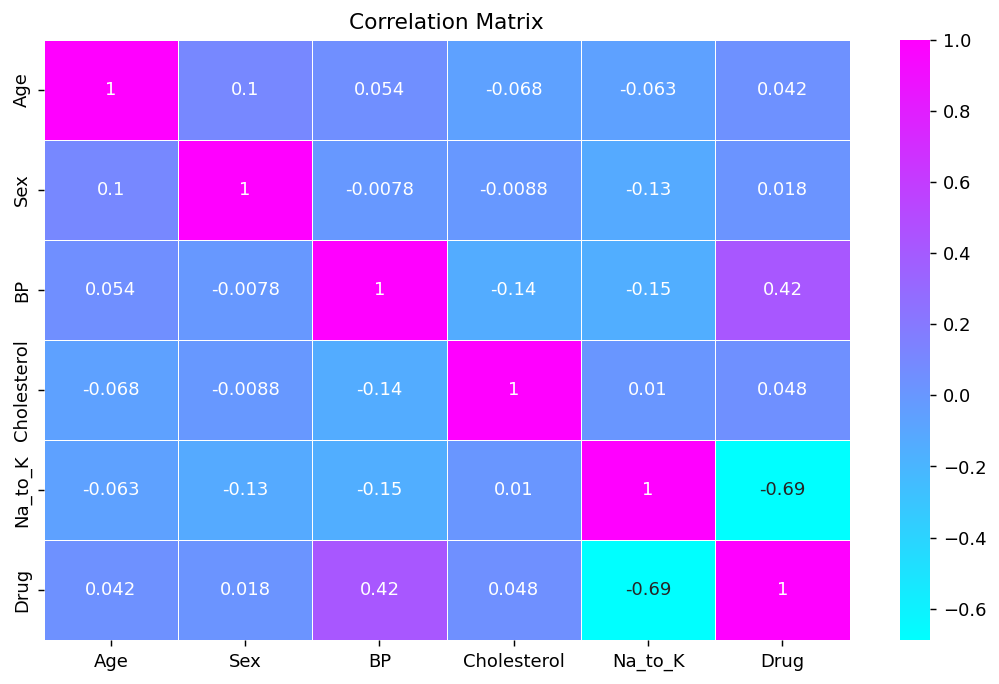

In [ ]:
plt.figure(figsize = (10,6), dpi = 130)
sns.heatmap(df.corr(), annot = True , cmap = 'cool', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(x)

     Age  Na_to_K  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0     23   25.355  False   False      False               False
1     47   13.093   True    True      False               False
2     47   10.114   True    True      False               False
3     28    7.798  False   False       True               False
4     61   18.043  False    True      False               False
..   ...      ...    ...     ...        ...                 ...
195   56   11.567  False    True      False               False
196   16   12.006   True    True      False               False
197   52    9.894   True   False       True               False
198   23   14.020   True   False       True                True
199   40   11.349  False    True      False                True

[200 rows x 6 columns]


In [ ]:
print(y)

[0 3 3 4 0 4 0 3 0 0 3 0 0 0 4 0 4 1 3 0 0 0 0 0 0 0 0 4 0 0 4 2 4 0 4 4 1
 4 4 4 0 2 0 4 4 4 1 3 0 0 0 4 0 0 2 3 2 0 4 0 0 1 0 4 2 0 1 4 0 0 2 0 4 0
 0 0 1 0 1 4 2 4 3 1 3 2 4 0 0 0 0 0 0 0 0 4 0 0 0 0 1 1 3 4 0 4 4 0 2 0 1
 4 4 4 4 0 4 4 1 0 0 0 0 0 2 0 0 4 0 4 0 0 4 0 0 4 2 1 2 4 1 0 2 0 1 4 4 1
 4 3 1 2 4 4 0 3 1 0 3 4 4 2 4 0 0 0 0 4 0 1 4 4 0 0 1 0 1 0 0 0 0 4 4 0 0
 0 2 1 0 0 0 1 0 3 0 3 3 4 4 4]


6. Spilting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 20)

7. Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)


In [ ]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [ ]:
Y_train[2]

array([1., 0., 0., 0., 0.], dtype=float32)

8. Create a Model

In [ ]:
Y_class = len(np.unique(y))
print(Y_class)

5


In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(36, activation='relu'))
output_layer = Dense(Y_class,activation='softmax')
model.add(output_layer)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                84        
                                                                 
 dense_5 (Dense)             (None, 24)                312       
                                                                 
 dense_6 (Dense)             (None, 36)                900       
                                                                 
 dense_7 (Dense)             (None, 5)                 185       
                                                                 
Total params: 1481 (5.79 KB)
Trainable params: 1481 (5.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9. Compile the model

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'] )

10. Train the model

In [ ]:
model.fit(X_train,Y_train,epochs = 20,batch_size = 6)

Epoch 1/20
27/27 [==============================] - 3s 90ms/step - loss: 1.5590 - accuracy: 0.3125
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 1.4133 - accuracy: 0.5312
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 1.2818 - accuracy: 0.6062
Epoch 4/20
27/27 [==============================] - 0s 2ms/step - loss: 1.1597 - accuracy: 0.6313
Epoch 5/20
27/27 [==============================] - 0s 2ms/step - loss: 1.0461 - accuracy: 0.6812
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 0.9395 - accuracy: 0.6812
Epoch 7/20
27/27 [==============================] - 0s 2ms/step - loss: 0.8307 - accuracy: 0.7125
Epoch 8/20
27/27 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.7563
Epoch 9/20
27/27 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.8000
Epoch 10/20
27/27 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.8438
Epoch 11/20
27/27 

11. Test the Accuracy

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(f'Accuracy is {accuracy*100}')

2/2 [==============================] - 0s 7ms/step - loss: 0.3554 - accuracy: 0.8750
Accuracy is 87.5


In [ ]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 4ms/step


array([[4.29232139e-04, 7.41694093e-01, 1.25074431e-01, 2.19989335e-03,
        1.30602255e-01],
       [9.98987675e-01, 1.02251795e-06, 1.22716483e-05, 2.57141422e-04,
        7.41749420e-04],
       [9.98970747e-01, 5.33051093e-07, 1.92365460e-05, 4.38364688e-04,
        5.71095035e-04],
       [9.97266650e-01, 3.80267993e-05, 2.70895951e-04, 1.54868831e-04,
        2.26947479e-03],
       [9.96933699e-01, 4.16112627e-04, 3.48782807e-04, 3.10090662e-04,
        1.99138070e-03],
       [9.99493659e-01, 1.82914334e-07, 4.21304048e-06, 1.05734616e-04,
        3.96120449e-04],
       [9.99946892e-01, 4.10422535e-06, 2.63651073e-05, 5.78270510e-06,
        1.67541766e-05],
       [6.02605287e-03, 4.20809329e-01, 8.74918245e-04, 4.65975583e-01,
        1.06314152e-01],
       [5.19994758e-02, 3.08171902e-02, 3.35164703e-02, 6.21226311e-01,
        2.62440562e-01],
       [1.99127600e-01, 2.83698295e-03, 2.47698324e-03, 7.41930187e-01,
        5.36281615e-02],
       [1.16557823e-02, 8.6002

In [ ]:
Y_test

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0.

In [ ]:
#Generating random input data
num_samples = 5

# Generating random data of the same shape as input features
random_input = np.random.rand(num_samples, X_train.shape[1])

# Scaling the random input data
random_input_scaled = sc.transform(random_input)

# Predicting using the trained model
predictions = model.predict(random_input_scaled)

# Decode one-hot encoded predictions to get the predicted drug
predicted_drugs = [np.argmax(pred) for pred in predictions]

# Mapping predicted drug index to actual drug name
drug_mapping = {0: 'drugA', 1: 'drugB', 2: 'drugC', 3: 'drugX', 4: 'drugY'}
predicted_drugs_names = [drug_mapping[pred] for pred in predicted_drugs]

# Displaying the random input and predicted drugs
print("Random Input Data:")
print(random_input)
print("\nPredicted Drugs:")
print(predicted_drugs_names)

1/1 [==============================] - 0s 19ms/step
Random Input Data:
[[0.05392691 0.86899919 0.2850319  0.86806566 0.28657951 0.94991819]
 [0.60429347 0.44989646 0.60968681 0.44372061 0.77448348 0.72244129]
 [0.85273538 0.4250468  0.19252501 0.59651173 0.14120651 0.95464729]
 [0.20574232 0.24798088 0.56615122 0.55141315 0.77418895 0.05897132]
 [0.26388129 0.69185086 0.01149061 0.38689884 0.48741514 0.09181983]]

Predicted Drugs:
['drugY', 'drugY', 'drugY', 'drugY', 'drugY']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
